## Костыра Екатерина ПМ_1901

## Занятие 6. Нелинейные модели для классификации

Веберите любые данные для задачи классификации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте нелинейные модели в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

### Информация об атрибутах:

1. длина чашелистика в см
2. ширина чашелистика в см
3. длина лепестка в см
4. ширина лепестка в см
5. класс:
- Iris Setosa
- Iris Versicolour
- Iris Virginica

Посмотрим на данные

In [4]:
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Опишем данные

In [6]:
dataframe.describe()

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### k-Nearest Neighbors

Aлгоритм k-ближайшего соседа

Классификация на основе соседей - это тип обучения на основе экземпляров или необобщающего обучения : он не пытается построить общую внутреннюю модель, а просто сохраняет экземпляры обучающих данных. Классификация вычисляется простым большинством голосов ближайших соседей каждой точки: точке запроса назначается класс данных, который имеет наибольшее количество представителей среди ближайших соседей точки.

KNeighborsClassifier реализует обучение на основе ближайшие соседи каждой точки запроса, где k - целочисленное значение, указанное пользователем

In [2]:
import os
os.chdir("C:/Users/79811/anaconda3/")

In [5]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9533333333333334


Точность модели равна 95%, следовательно, что говорит нам о том, что наша модель работает достаточно хорошо

### Naive Bayes

Наивные методы Байеса - это набор алгоритмов контролируемого обучения, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой характеристик при заданном значении переменной класса


In [7]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9533333333333334


По результатам видим, что средняя точность наивного классификатора Байеса равна 95%

### Classification and Regression Trees

Деревья принятия решений

Дерево решений - это метод без распределения или непараметрический метод, который не зависит от предположений о распределении вероятностей. Деревья решений могут обрабатывать многомерные данные с хорошей точностью

In [9]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9466666666666667


По результатам видим, что средняя точность метода дерева решений равна 95%

### Выбор лучшего алгоритма машинного обучения для задачи классификации

LR: 0.953333 (0.084591)
LDA: 0.980000 (0.030551)
KNN: 0.953333 (0.052068)
CART: 0.946667 (0.049889)
NB: 0.953333 (0.066999)
SVM: 0.960000 (0.053333)


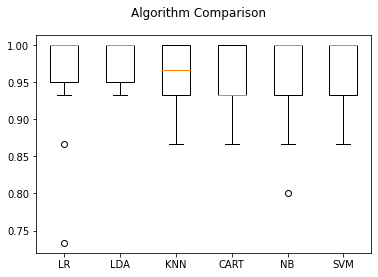

In [10]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

По результатам видим:

Средняя оценка точности LR равна 95%, а стандартное отклонение 8%


Средняя оценка точности  LDA равна 98%, а стандартное отклонение 3%


Средняя оценка точности  KNN равна 95%, а стандартное отклонение 5%


Средняя оценка точности  CART равна 95%, а стандартное отклонение 5%


Средняя оценка точности  NB равна 95%, а стандартное отклонение 7%


Средняя оценка точности  SVM равна 96%, а стандартное отклонение 5%

Поэтому можем сказать, что с точностью в 98% лучше всего работает алгоритм LDA, а хуже всего метод LR и NB

## Создание пайплайна (программного конвеера)

### Программный конвеер подготовки данных и моделирования

Конвейер обработки данных состоит из связанных между собой узлов, т.е. функций. Узел характеризуется набором входных и выходных каналов, по которым могут передаваться объекты. Узел ожидает появления определенного набора объектов на своем входном канале, после чего проводит вычисления и порождает объект(ы) на своем выходном канале, которые передаются в следующий узел в конвейере

In [12]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data
filename = "bezdekIris (2).data"
names = ['Длина чашелистика','Ширина чашелистика','Длина лепестка','Ширина лепестка','Класс']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:4]
Y = array[:,4]
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9800000000000001


По результатам можем наблюдать, что процентная точность равна 98, следовательно, программный конвеер работает хорошо